# Exploratory Data Analysis of Fuel Futures Markets
This project performs Exploratory Data Analysis (EDA) on a dataset from Kaggle containing historical futures data for key fuel commodities. The goal is to uncover trends, patterns, correlations, and behaviors in the pricing and trading activity of these energy assets.

We focus on the following fuel commodities:

## Commodities Analyzed
**Crude Oil**: Unrefined petroleum used as the raw material for gasoline, diesel, and other fuels.

**Brent Crude Oil**: A global benchmark for crude oil extracted from the North Sea.

**Heating Oil**: A refined product used primarily for heating buildings, especially in colder climates.

**RBOB Gasoline**: A cleaner-burning gasoline used widely in the U.S. for vehicle fuel.

## Problem Statements
#### Correlation Analysis
1. How correlated are the prices of the commodities?
2. Are trading volumes across different commodities correlated?
#### Price Behavior & Volatility
3. Which commodities exhibit the highest price volatility over time?
4. Are there consistent periods of high or low volatility throughout the year for specific commodities?
#### Liquidity
5. What is the relationship between trading volume and price volatility?
#### Trading & Profitability (Future Scope)
6.	What is the best trading strategy for fuel futures to maximize profitability?

## Terminologies Explained (For Non-Experts)

| Term               | Description                                                                     |
| ------------------ | ------------------------------------------------------------------------------- |
| **Futures**        | A contract to buy/sell a commodity at a future date and price.                  |
| **Commodity**      | A raw material or primary product like oil or gas traded in markets.            |
| **Daily Return**   | The percent change in price from one day to the next.                           |
| **Volatility**     | A measure of how much prices fluctuate; usually calculated via std deviation.   |
| **Trading Volume** | The number of contracts traded in a given period; a measure of market activity. |
| **Rolling Window** | A moving time window (e.g., 10 days) used to calculate metrics like volatility. |
| **Correlation**    | A statistical relationship between two variables (e.g., price and volume).      |


## Dataset

https://www.kaggle.com/datasets/guillemservera/fuels-futures-data/data

## Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Dataset

In [3]:
df = pd.read_csv(r'C://Users//ankam//Desktop//Energy Futures Dataset//all_fuels_data.csv', encoding = 'UTF-8')
df

,ticker,commodity,date,open,high,low,close,volume
0,CL=F,Crude Oil,2000-08-23,31.950001,32.799999,31.950001,32.049999,79385
1,CL=F,Crude Oil,2000-08-24,31.900000,32.240002,31.400000,31.629999,72978
2,CL=F,Crude Oil,2000-08-25,31.700001,32.099998,31.320000,32.049999,44601
3,CL=F,Crude Oil,2000-08-28,32.040001,32.919998,31.860001,32.869999,46770
4,CL=F,Crude Oil,2000-08-29,32.820000,33.029999,32.560001,32.720001,49131
...,...,...,...,...,...,...,...,...
28070,BZ=F,Brent Crude Oil,2024-06-17,82.620003,84.550003,82.110001,84.250000,32978
28071,BZ=F,Brent Crude Oil,2024-06-18,84.400002,85.480003,83.660004,85.330002,45690
28072,BZ=F,Brent Crude Oil,2024-06-20,85.379997,85.970001,84.889999,85.709999,52543
28073,BZ=F,Brent Crude Oil,2024-06-21,85.680000,86.230003,84.839996,85.239998,25055


## Data Cleaning and Pre-processing

1. Get basic information about the dataset
2. Check the types of commodities and how many years of data we have.
3. Check for duplicates and null values
4. Are there any outliers? How are we handling them?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28075 entries, 0 to 28074
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     28075 non-null  object 
 1   commodity  28075 non-null  object 
 2   date       28075 non-null  object 
 3   open       28075 non-null  float64
 4   high       28075 non-null  float64
 5   low        28075 non-null  float64
 6   close      28075 non-null  float64
 7   volume     28075 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 1.7+ MB


In [5]:
commodities = list(df['commodity'].unique())
print(commodities)

['Crude Oil', 'Heating Oil', 'Natural Gas', 'RBOB Gasoline', 'Brent Crude Oil']


In [6]:
df['date'] = pd.to_datetime(df['date'])
date_range = df.groupby('commodity')['date'].agg(['min', 'max']).reset_index()
date_range['Duration'] = (date_range['max'] - date_range['min']).dt.days / 365
date_range['Duration'] = date_range['Duration'].round(2)
print(date_range)

         commodity        min        max  Duration
0  Brent Crude Oil 2007-07-30 2024-06-24     16.92
1        Crude Oil 2000-08-23 2024-06-24     23.85
2      Heating Oil 2000-09-01 2024-06-24     23.83
3      Natural Gas 2000-08-30 2024-06-24     23.83
4    RBOB Gasoline 2000-11-01 2024-06-24     23.66


In [7]:
df.drop_duplicates()
df.count()

ticker       28075
commodity    28075
date         28075
open         28075
high         28075
low          28075
close        28075
volume       28075
dtype: int64

In [8]:
df.isnull().sum()

ticker       0
commodity    0
date         0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

It can be easily inferred from this that:
1. Categorical Variable: **commodity**
2. Numerical Variable: **opening price, closing price, high, low & volume**
3. 
**Thus, as we can see, the dataset does not contain any duplicates or null values**

In [9]:
df.describe()

,date,open,high,low,close,volume
count,28075,28075.000000,28075.000000,28075.000000,28075.000000,2.807500e+04
mean,2013-02-15 07:20:35.476402432,27.288994,27.680580,26.873389,27.287224,1.059926e+05
min,2000-08-23 00:00:00,-14.000000,0.507000,-40.320000,-37.630001,0.000000e+00
25%,2007-09-11 00:00:00,2.031000,2.060550,1.998200,2.031250,2.641100e+04
50%,2013-04-23 00:00:00,3.374000,3.450000,3.301000,3.375900,4.903300e+04
75%,2018-11-21 00:00:00,54.895000,55.745001,53.910000,54.900000,1.147245e+05
max,2024-06-24 00:00:00,146.080002,147.429993,144.270004,146.080002,2.288230e+06
std,NaN,36.085625,36.540236,35.599243,36.089001,1.484400e+05


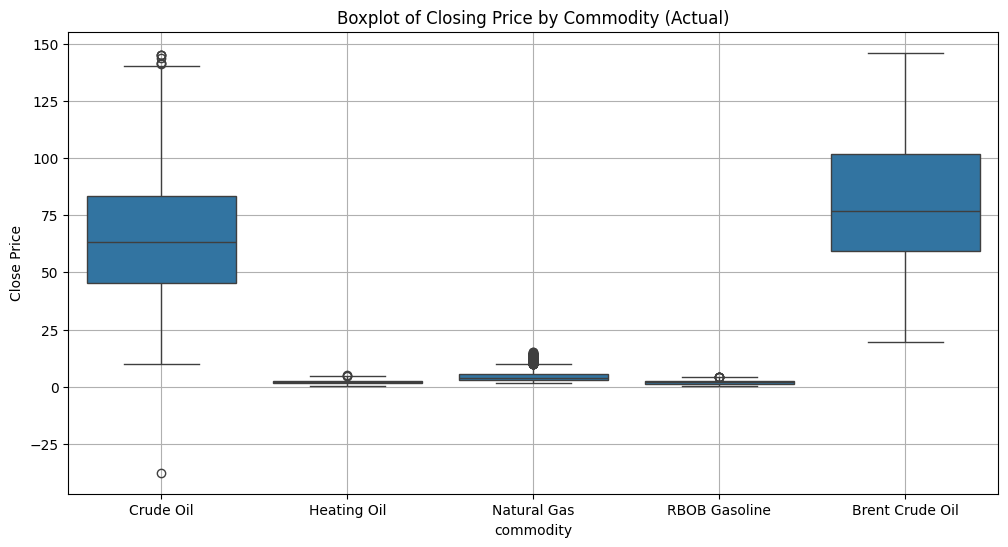

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='commodity', y='close')
plt.title('Boxplot of Closing Price by Commodity (Actual)')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

In [11]:
def remove_outliers_std_range(df, group_col, value_cols, n_std=3):
    df_clean = df.copy()
    
    for col in value_cols:
        mean = df_clean.groupby(group_col)[col].transform('mean')
        std = df_clean.groupby(group_col)[col].transform('std')
        lower = mean - n_std * std
        upper = mean + n_std * std
        
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    
    return df_clean

numeric_cols = ['open', 'high', 'low', 'close', 'volume']

df_cleaned = remove_outliers_std_range(df, group_col='commodity', value_cols=numeric_cols, n_std=3)

print("Original shape:", df.shape)
print("After outlier removal:", df_cleaned.shape)

Original shape: (28075, 8)
After outlier removal: (27688, 8)


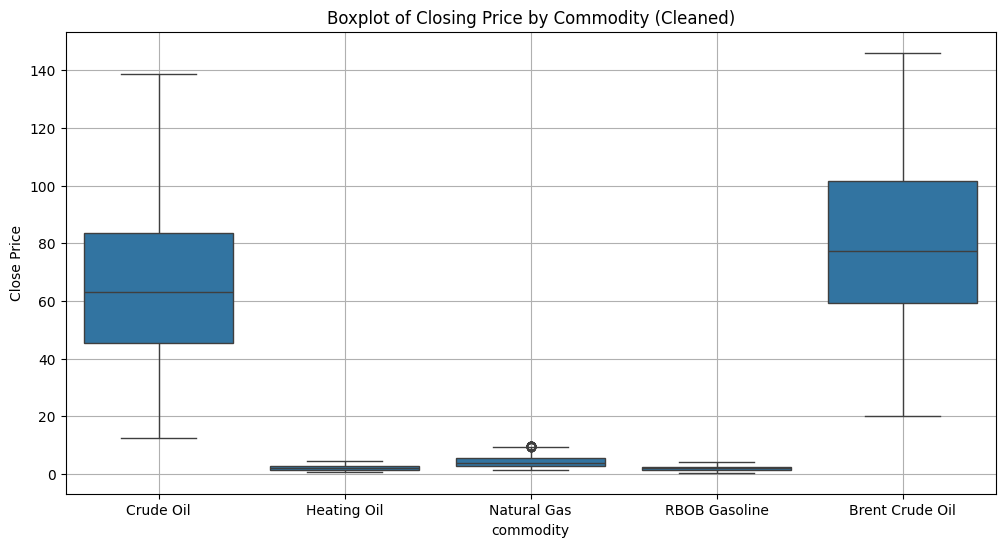

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='commodity', y='close')
plt.title('Boxplot of Closing Price by Commodity (Cleaned)')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

### Correlational Analysis
#### 1. How correlated are the prices of the commodities?

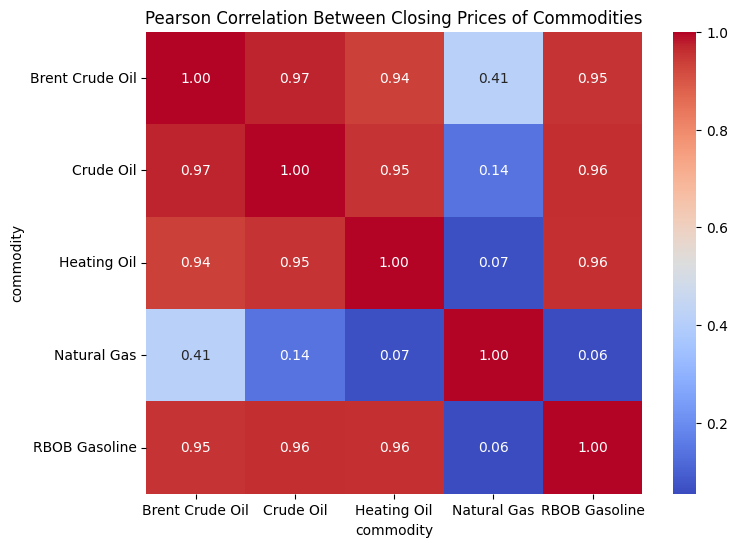

In [13]:
df_cleaned['date'] = pd.to_datetime(df['date'])
pivot_df = df_cleaned.pivot_table(index='date', columns = 'commodity', values ='close')
pcorr_comm = pivot_df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(pcorr_comm, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Between Closing Prices of Commodities')
plt.show()

#### 2.	Are trading volumes across different commodities correlated?

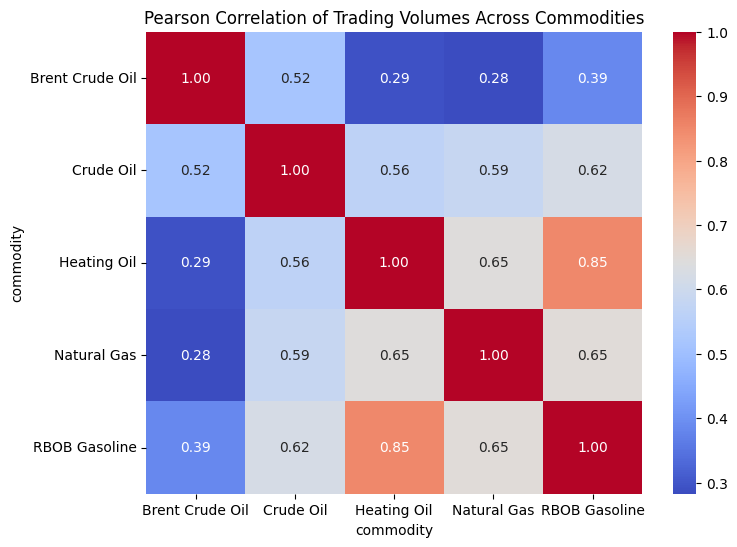

In [14]:
df_cleaned['date'] = pd.to_datetime(df['date'])
pivot_df = df_cleaned.pivot_table(index='date', columns = 'commodity', values ='volume')
pcorr_vol = pivot_df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(pcorr_vol, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation of Trading Volumes Across Commodities')
plt.show()

### Observations
#### 1. How correlated are the prices of the commodities?
* The closing prices of Brent Crude Oil, Crude Oil, Heating Oil, and RBOB Gasoline show very strong positive correlations (0.94 to 0.97). This means their prices tend to move together and are likely affected by similar market factors.

* In contrast, Natural Gas has very weak correlations with the other commodities (0.06 to 0.41). This suggests that Natural Gas is influenced by different market dynamics, possibly because of its specific uses such as heating and electricity generation.

##### Conclusion:
Natural Gas appears to behave independently from the other commodities in terms of price movements. For investors, this means that adding Natural Gas to an energy-focused portfolio could help reduce risk through diversification.

#### 2. Are trading volumes across different commodities correlated?
* The strongest correlation in trading volume is between Heating Oil and RBOB Gasoline (0.85). This is likely because both are used in heating and transport, and their demand often increases at the same times, like during winter.

* On the other hand, Brent Crude Oil shows weaker correlations with the trading volumes of other commodities, 0.28 with Natural Gas and 0.29 with Heating Oil. This might mean Brent Crude is traded more independently, possibly due to its role as a global benchmark and the influence of broader geopolitical and economic factors.

##### Conclusion:
Some commodities show closely linked trading volumes due to shared demand patterns, while others, like Brent Crude, follow their own trading behavior. This highlights the diversity in how energy commodities are traded in the market.

### Price Behavior and Volatility

#### 3. Which commodities exhibit the highest price volatility over time?

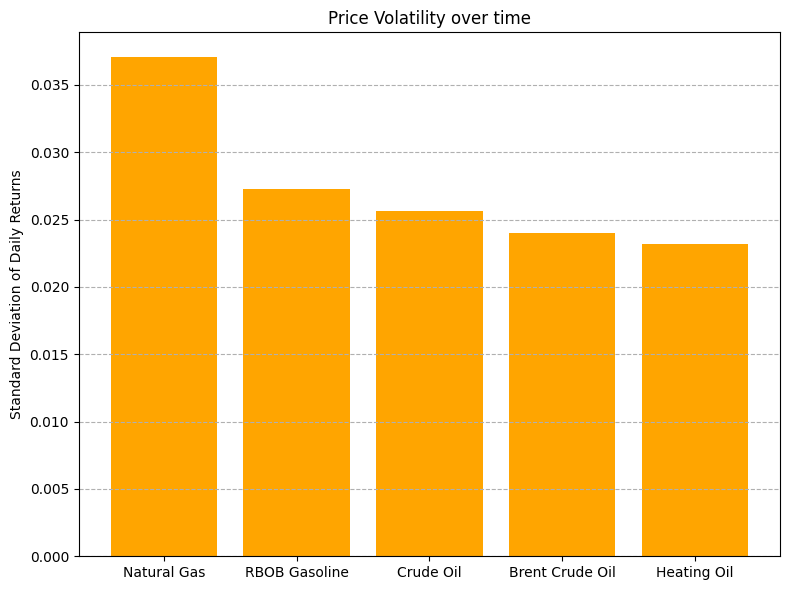

In [15]:
df_cleaned = df_cleaned.sort_values(by=['commodity', 'date'])
df_cleaned['Daily_Return'] = df_cleaned.groupby('commodity')['close'].pct_change()

volatility = df_cleaned.groupby('commodity')['Daily_Return'].std().reset_index()
volatility.columns = ['commodity', 'volatility']
volatility = volatility.sort_values(by='volatility', ascending=False)

plt.figure(figsize=(8, 6))
plt.bar(volatility['commodity'], volatility['volatility'], color='orange')
plt.ylabel('Standard Deviation of Daily Returns')
plt.title('Price Volatility over time')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

#### 4. Are there consistent periods of high or low volatility throughout the year for specific commodities?

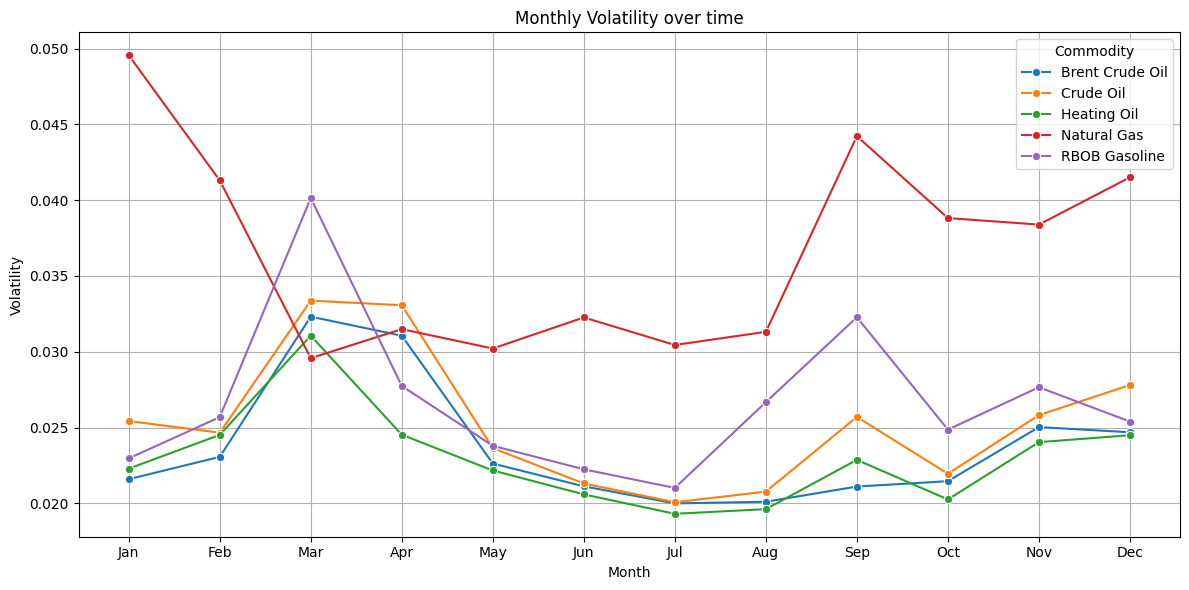

In [16]:
df_cleaned['Month'] = df_cleaned['date'].dt.month
df_cleaned['Month_Name'] = df_cleaned['date'].dt.strftime('%b')
monthly_volatility = df_cleaned.groupby(['commodity', 'Month_Name'])['Daily_Return'].std().reset_index()
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_volatility['Month_Name'] = pd.Categorical(monthly_volatility['Month_Name'], categories=month_order, ordered=True)
monthly_volatility = monthly_volatility.sort_values(by=['commodity', 'Month_Name'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_volatility, x='Month_Name', y='Daily_Return', hue='commodity', marker='o')
plt.title('Monthly Volatility over time')
plt.ylabel('Volatility')
plt.xlabel('Month')
plt.grid(True)
plt.legend(title='Commodity')
plt.tight_layout()
plt.show()

### Observations
#### 3. Which commodities exhibit the highest price volatility over time?
* Natural Gas shows the highest price volatility among all commodities followed by RBOB Gasoline, as indicated by large standard deviations of daily returns. This means their prices tend to fluctuate more compared to others, possibly due to factors like weather-driven demand.

* The rest: Crude Oil, Brent Crude Oil, and Heating Oil, show moderate and similar levels of volatility, suggesting more stable price movements in comparison.

##### Conclusion:
Natural Gas is the most volatile commodity in this group, making it a higher-risk, higher-reward asset. Investors or traders dealing with energy commodities should consider this volatility profile when making portfolio decisions.

#### 4. Are there consistent periods of high or low volatility throughout the year for specific commodities?
* Natural Gas shows distinct seasonal volatility, with higher levels in January, February, September, and December. These peaks likely reflect seasonal demand changes, especially during winter months, when heating needs rise.

* RBOB Gasoline tends to have increased volatility in March and September, which may correspond to driving season effects (e.g., spring/summer travel).

* Crude Oil and Brent Crude Oil show relatively stable volatility throughout the year, with minor peaks in March-April and November–December, potentially influenced by end-of-year demand adjustments.

* Heating Oil generally mirrors Natural Gas trends but with lower volatility. It also sees a slight rise in early spring and late fall, which may align with transitional heating periods.

##### Conclusion:
Some energy commodities, particularly Natural Gas and RBOB Gasoline, display clear seasonal volatility patterns, while others remain more stable across the year. These trends highlight the importance of seasonal factors such as weather conditions and consumer behavior in shaping market dynamics.

### Liquidity
#### 5. What is the relationship between trading volume and price volatility?

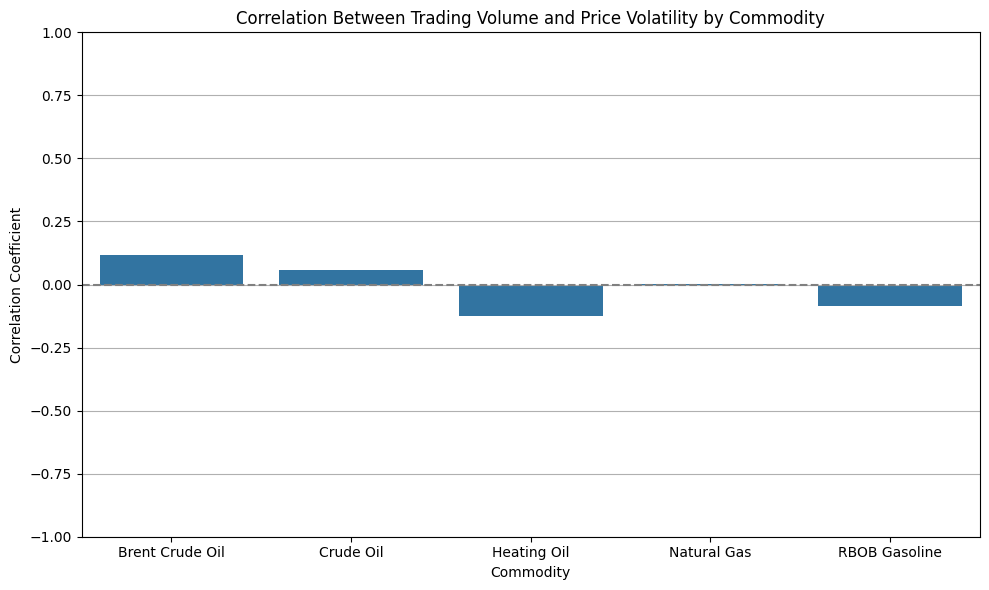

In [20]:
df_cleaned['Rolling_Volatility'] = df_cleaned.groupby('commodity')['Daily_Return'].transform(lambda x: x.rolling(window=10).std())
df_cleaned = df_cleaned.dropna(subset=['Rolling_Volatility', 'volume'])
correlations = (
    df_cleaned.groupby('commodity')[['volume', 'Rolling_Volatility']]
    .corr()
    .unstack()
    .iloc[:, 1]  
    .reset_index()
)

df_comm = df_cleaned.groupby('commodity')
corr_list = []

for name, group in df_comm:
    corr = group[['volume', 'Rolling_Volatility']].corr().iloc[0, 1]
    corr_list.append({'commodity': name, 'correlation': corr})
    
correlations = pd.DataFrame(corr_list)

plt.figure(figsize=(10, 6))
sns.barplot(data=correlations, x='commodity', y='correlation')
plt.axhline(0, color='gray', linestyle='--')
plt.ylim(-1, 1)
plt.title('Correlation Between Trading Volume and Price Volatility by Commodity')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Commodity')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Observations
#### 5. What is the relationship between trading volume and price volatility?
* The correlation between trading volume and price volatility is generally weak across all commodities.

* Brent Crude Oil and Crude Oil show a slight positive correlation, suggesting that when trading volumes increase, their price volatility may also increase a little. However, the relationship is not strong enough to draw a firm conclusion.

* Heating Oil and RBOB Gasoline show a negative correlation, meaning that higher trading volumes are slightly associated with lower volatility. This could imply that greater market participation brings more price stability for these refined products.

* Natural Gas shows almost no correlation, indicating that its volatility is likely influenced by other factors such as weather conditions and market dynamics, rather than trading volume.

##### Conclusion:
Overall, there is no strong or consistent relationship between trading volume and price volatility for these commodities. This suggests that other market factors play a more significant role in driving price movements than trading activity alone.

### Trading & Profitability (Future Scope)
#### 6.	What is the best trading strategy for fuel futures to maximize profitability?

* While this analysis focuses on exploratory data insights, a future direction involves evaluating various trading strategies for these fuel futures. This includes testing strategies like moving average crossovers, Bollinger Bands, or momentum-based trading. By backtesting these strategies on historical price data and evaluating key performance metrics, we can identify which approaches offer the best profitability and risk-adjusted returns in commodity markets.

### Thank you for reviewing my analysis project. 
#### If you have any feedback, suggestions for future improvements, or questions, please don’t hesitate to reach out at nikhil.ankam@utoledo.edu.